<a href="https://colab.research.google.com/github/laurentpm/PhD-level-intro-AI-final-project/blob/main/Copy_of_HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 378kB 4.2MB/s 


In [ ]:
!pip install yfinance

In [ ]:
# regime_hmm_train.py

from __future__ import print_function

import datetime
import pickle
import warnings

from hmmlearn.hmm import GaussianHMM
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
import yfinance as yf

In [ ]:
spy_ohlc_df = yf.download('SPY', start='1993-02-01', end='2019-12-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
spy_ohlc_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.968750,44.250000,43.968750,44.250000,26.068277,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,26.123499,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,26.399649,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.510111,531500
1993-02-05,44.968750,45.062500,44.718750,44.968750,26.491711,492100
...,...,...,...,...,...,...
2019-11-22,311.089996,311.239990,309.850006,310.959991,302.774231,44850200
2019-11-25,311.980011,313.369995,311.980011,313.369995,305.120789,48647200
2019-11-26,313.410004,314.279999,313.059998,314.079987,305.812073,37569000


In [ ]:
spy_ohlc_df.to_csv('SPY.csv')

In [ ]:
def obtain_prices_df(csv_filepath, end_date):
    """
    Obtain the prices DataFrame from the CSV file,
    filter by the end date and calculate the 
    percentage returns.
    """
    df = pd.read_csv(
        csv_filepath, header=0,
        names=[
            "Date", "Open", "High", "Low", 
            "Close", "Adj Close", "Volume"
        ],
        index_col="Date", parse_dates=True
    )
    df["Returns"] = df["Adj Close"].pct_change()
    df = df[:end_date.strftime("%Y-%m-%d")]
    df.dropna(inplace=True)
    return df


def plot_in_sample_hidden_states(hmm_model, df):
    """
    Plot the adjusted closing prices masked by 
    the in-sample hidden states as a mechanism
    to understand the market regimes.
    """
    # Predict the hidden states array
    hidden_states = hmm_model.predict(rets)
    # Create the correctly formatted plot
    fig, axs = plt.subplots(
        hmm_model.n_components, 
        sharex=True, sharey=True
    )
    colours = cm.rainbow(
        np.linspace(0, 1, hmm_model.n_components)
    )
    for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        ax.plot_date(
            df.index[mask], 
            df["Adj Close"][mask], 
            ".", linestyle='none', 
            c=colour
        )
        ax.set_title("Hidden State #%s" % i)
        ax.xaxis.set_major_locator(YearLocator())
        ax.xaxis.set_minor_locator(MonthLocator())
        ax.grid(True)
    plt.show()


Model Score: 15937.71115264345


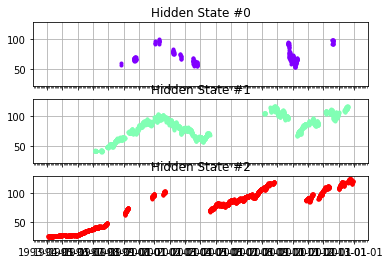

Pickling HMM model...
...HMM model pickled.


In [ ]:
if __name__ == "__main__":
    # Hides deprecation warnings for sklearn
    warnings.filterwarnings("ignore")

    # Create the SPY dataframe from the Yahoo Finance CSV
    # and correctly format the returns for use in the HMM
    csv_filepath = "SPY.csv"
    pickle_path = "hmm_model_spy.pkl"
    end_date = datetime.datetime(2012, 12, 1)
    spy = obtain_prices_df(csv_filepath, end_date)
    rets = np.column_stack([spy["Returns"]])

    # Create the Gaussian Hidden markov Model and fit it
    # to the SPY returns data, outputting a score
    hmm_model = GaussianHMM(
        n_components=3, covariance_type="full", n_iter=1000
    ).fit(rets)
    print("Model Score:", hmm_model.score(rets))
  
    # Plot the in sample hidden states closing values
    plot_in_sample_hidden_states(hmm_model, spy)

    print("Pickling HMM model...")
    pickle.dump(hmm_model, open(pickle_path, "wb"))
    print("...HMM model pickled.")

In [ ]:
spy

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
1993-02-02,44.218750,44.375000,44.125000,44.343750,26.123499,201300,0.002118
1993-02-03,44.406250,44.843750,44.375000,44.812500,26.399649,529400,0.010571
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.510111,531500,0.004184
1993-02-05,44.968750,45.062500,44.718750,44.968750,26.491711,492100,-0.000694
1993-02-08,44.968750,45.125000,44.906250,44.968750,26.491711,596100,0.000000
...,...,...,...,...,...,...,...
2012-11-26,140.649994,141.360001,140.190002,141.050003,119.393944,100124400,-0.002122
2012-11-27,140.910004,141.389999,140.240005,140.330002,118.784500,128646200,-0.005104
2012-11-28,139.759995,141.539993,139.000000,141.460007,119.740990,177086500,0.008052
